# LCA of Germany's grid expansion


In [1]:
import bw2data as bd

In [ ]:
bd.projects.set_current("plca_grid_expansion")

We do quite a few calculations here. To save some time, e.g., if only interested in the plots, set the "recalculate" variable to False.


In [3]:
method = ('IPCC 2021', 'climate change', 'GWP 100a, incl. H and bio CO2')

In [4]:
recalculate = False

## GWI of static vs prospective expansion (Figure 4)


In [5]:
static_expansion_nodes = sorted([node for node in bd.Database("grid_expansion_static")])
prospective_expansion_nodes_base = sorted(
    [
        node
        for node in bd.Database("grid_expansion_prospective")
        if "NPi" in node["name"]
    ]
)
prospective_expansion_nodes_rcp26 = sorted(
    [
        node
        for node in bd.Database("grid_expansion_prospective")
        if "PkBudg1000" in node["name"]
    ]
)
prospective_expansion_nodes_rcp19 = sorted(
    [
        node
        for node in bd.Database("grid_expansion_prospective")
        if "PkBudg650" in node["name"]
    ]
)
prospective_expansion_nodes = (
    prospective_expansion_nodes_base
    + prospective_expansion_nodes_rcp26
    + prospective_expansion_nodes_rcp19
)

Calculating the LCA results for the static and prospective cases:


In [6]:
import bw2calc as bc
import json

if recalculate:
    # static expansion
    results_components = {}
    lca = bc.LCA(demand={static_expansion_nodes[0]: 1}, method=method)
    lca.lci(factorize=True)
    for node in static_expansion_nodes:
        component_results = {}
        for exc in node.technosphere():
            lca.lcia(demand={exc.input.id: exc.amount})
            component_results[exc.input["name"]] = lca.score
        results_components[node["name"]] = component_results

    # prospective expansion
    lca = bc.LCA(demand={prospective_expansion_nodes[0]: 1}, method=method)
    lca.lci(factorize=True)
    for node in prospective_expansion_nodes:
        component_results = {}
        for exc in node.technosphere():
            lca.lcia(demand={exc.input.id: exc.amount})
            component_results[exc.input["name"]] = lca.score
        results_components[node["name"]] = component_results

    json.dump(results_components, open("data/expansion_component_results.json", "w"))

In [7]:
import pandas as pd

results_components = json.load(open("data/expansion_component_results.json"))
df_components = pd.DataFrame(results_components)

df_components.columns = pd.MultiIndex.from_tuples(
    [(col.split("_", 2)[1], col.rsplit("_", 1)[1]) for col in df_components.columns]
)

Plotting setup:


In [8]:
from RWTHColors import ColorManager

cm = ColorManager()

plot_colors = []
plot_colors_light = []
color_list = [
    cm.RWTHBlau,
    #   cm.RWTHPetrol,
    cm.RWTHTuerkis,
    cm.RWTHGruen,
    cm.RWTHMaiGruen,
    cm.RWTHOrange,
    cm.RWTHRot,
    # cm.RWTHBordeaux,
    # cm.RWTHViolett,
    cm.RWTHLila,
]
intensities = [100, 50, 10]

for intensity in intensities:
    for color in color_list:
        plot_colors.append(color.p(intensity))

for intensity in [75, 50, 10]:
    for color in color_list:
        plot_colors_light.append(color.p(intensity))

plot_colors_expansion = [
    cm.RWTHBlau.p(100),
    "#2069AB",
    cm.RWTHBlau.p(75),
    cm.RWTHBlau.p(50),
    cm.RWTHBlau.p(25),
]

plot_colors_components = [
    cm.RWTHPetrol.p(100),  # overhead lines
    cm.RWTHGruen.p(100),  # cables
    cm.RWTHMagenta.p(75),  # switchgears
    cm.RWTHLila.p(100),  # transformers
    cm.RWTHViolett.p(100),  # substations
]

plot_colors_materials = [
    cm.RWTHOrange.p(100),  # aluminium
    cm.RWTHTuerkis.p(100),  # iron & steel
    cm.RWTHRot.p(75),  # copper
    cm.RWTHMaiGruen.p(100),  # SF6
    cm.RWTHGelb.p(75),  # plastics
    cm.RWTHPetrol.p(50),  # concrete
    cm.RWTHSchwarz.p(50),  # other materials
]

plot_colors_processes = [
    cm.RWTHGelb.p(100),  # electricity
    cm.RWTHTuerkis.p(50),  # iron & steel (process emissions)
    cm.RWTHRot.p(100),  # heat
    cm.RWTHBlau.p(50),  # transport
    cm.RWTHSchwarz.p(75),  # coal
    cm.RWTHMaiGruen.p(100),  # SF6
    cm.RWTHOrange.p(50),  # aluminium (process emissions)
    cm.RWTHViolett.p(75),  # clinker
    cm.RWTHSchwarz.p(50),  # other processes
]

In [9]:
df_sankey = pd.read_csv("data/sankey_data.csv")
score_grid_status_quo = df_sankey[df_sankey["target"] == "grid status quo"][
    "value"
].sum()
data_base = {"Score": [score_grid_status_quo]}
df_base = pd.DataFrame(data_base)

data_static = {"Score": df_components["static"].sum().values / 1e9}
df_static = pd.DataFrame(data_static)

data_ssp2_base = {"Score": df_components["NPi"].sum().values / 1e9}
df_ssp2_base = pd.DataFrame(data_ssp2_base)

data_rcp26 = {"Score": df_components["PkBudg1000"].sum().values / 1e9}
df_rcp26 = pd.DataFrame(data_rcp26)

data_rcp19 = {"Score": df_components["PkBudg650"].sum().values / 1e9}
df_rcp19 = pd.DataFrame(data_rcp19)


## GWI contributions on the expansion period, component, material and process level (Figure 4)


### Components & Expansion Periods


In [ ]:
# Data
df_sankey = pd.read_csv("data/sankey_data.csv")
score_grid_status_quo = df_sankey[df_sankey["target"] == "grid status quo"][
    "value"
].sum()
data_base = {"Score": [score_grid_status_quo]}
df_base = pd.DataFrame(data_base)

data_static = {"Score": df_components["static"].sum().values / 1e9}
df_static = pd.DataFrame(data_static)

data_ssp2_base = {"Score": df_components["NPi"].sum().values / 1e9}
df_ssp2_base = pd.DataFrame(data_ssp2_base)

data_rcp26 = {"Score": df_components["PkBudg1000"].sum().values / 1e9}
df_rcp26 = pd.DataFrame(data_rcp26)

data_rcp19 = {"Score": df_components["PkBudg650"].sum().values / 1e9}
df_rcp19 = pd.DataFrame(data_rcp19)

# Aggregate expansion to 2037 & 2040
for df in [df_static, df_ssp2_base, df_rcp26, df_rcp19]:
    df.at[3, "Score"] = df["Score"].iloc[3:5].sum()
    df.drop(index=4, inplace=True)
    
df_expansion_periods = pd.DataFrame({
    "BAU": df_static["Score"].values,
    "3.0°C scenario": df_ssp2_base["Score"].values,
    "2.0°C scenario": df_rcp26["Score"].values,
    "1.5°C scenario": df_rcp19["Score"].values,
})

df_expansion_periods.loc["SPACING"] = [
    0,
    df_expansion_periods["BAU"].sum() - df_expansion_periods["3.0°C scenario"].sum(),
    df_expansion_periods["BAU"].sum() - df_expansion_periods["2.0°C scenario"].sum(),
    df_expansion_periods["BAU"].sum() - df_expansion_periods["1.5°C scenario"].sum(),
]

df_expansion_periods.index = ["2023 → 2025", "2025 → 2030", "2030 → 2035", "2035 → 2040", "2040 → 2045", "SPACING"]

In [11]:
components = pd.DataFrame(
    {
        "static": df_components["static"].T.sum().values,
        "Base": df_components["NPi"].T.sum().values,
        "RCP26": df_components["PkBudg1000"].T.sum().values,
        "RCP19": df_components["PkBudg650"].T.sum().values,
    },
    index=df_components.index,
)

component_groups = {
    "Overhead line": "overhead lines",
    "cable": "cables",
    "Transformer": "transformers",
    "switchgear": "switchgears",
    "Substation": "substations",
}


def map_labels(labels, groups, other_label="other"):
    new_labels = {}
    for label in labels:
        for key, group in groups.items():
            if key in label:
                new_labels[label] = group
                break
        else:
            new_labels[label] = other_label
    return new_labels


components.index = components.index.map(
    map_labels(components.index, component_groups, other_label="other components")
)
components = components.groupby(level=0).sum()

# sorting
components["sort_key"] = components.index != "other components"
components = components.sort_values(by=["sort_key", "static"], ascending=[True, True])
components = components.drop(columns="sort_key")

components.loc["SPACING"] = [
    0,
    components["static"].sum() - components["Base"].sum(),
    components["static"].sum() - components["RCP26"].sum(),
    components["static"].sum() - components["RCP19"].sum(),
]
components

,static,Base,RCP26,RCP19
substations,4.159103e+08,3.712906e+08,3.470247e+08,3.118198e+08
transformers,1.364486e+09,1.154732e+09,1.023870e+09,8.711481e+08
switchgears,2.489591e+09,2.450680e+09,2.437099e+09,2.428951e+09
cables,1.292233e+10,1.076153e+10,9.911033e+09,9.338297e+09
overhead lines,1.367599e+10,1.178401e+10,1.108822e+10,1.051193e+10
SPACING,0.000000e+00,4.346074e+09,6.061073e+09,7.406169e+09


### Materials


In [12]:
import bw2calc as bc

In [13]:
if recalculate:
    results_materials = {}
    bioflows = {}
    material_sums = {}

    for node in static_expansion_nodes + prospective_expansion_nodes:
        component_results = {}
        lca = bc.LCA({node: 1}, method=method)
        lca.lci(factorize=True)
        for component in node.technosphere():
            material_results = {}
            for material in list(component.input.technosphere()):
                lca.lcia(demand={material.input.id: material.amount * component.amount})
                material_results[material.input["name"]] = lca.score
            for bioflow in component.input.biosphere():
                bioflows[component.input["name"]] = bioflow
            component_results[component.input["name"]] = material_results

        results_materials[node["name"]] = component_results

    # Sum up materials
    for scenario, comp in results_materials.items():
        for component, materials in comp.items():
            for material, value in materials.items():
                if material not in material_sums:
                    material_sums[material] = {}
                if scenario not in material_sums[material]:
                    material_sums[material][scenario] = 0
                material_sums[material][scenario] += value

    with open("data/expansion_materials_results_remind-eu_premise_gwp.json", "w") as f:
        json.dump(material_sums, f)

In [14]:
results_materials = json.load(open("data/expansion_materials_results.json"))
materials = pd.DataFrame.from_dict(results_materials, orient="index")

In [15]:
# Add SF6 leakage
distributed_components = json.load(open("data/distributed_components.json"))

sf6_row = {}

for col, year in zip(
    materials.columns,
    [
        2023,
        2025,
        2030,
        2035,
        2037,
        2040,
        2023,
        2025,
        2030,
        2035,
        2037,
        2040,
        2023,
        2025,
        2030,
        2035,
        2037,
        2040,
        2023,
        2025,
        2030,
        2035,
        2037,
        2040,
    ],
):
    sf6_impact = (
        distributed_components[str(year)]["gas_insulated_switchgear_420kv"]
        * 28.6
        * 25200
    )  # emissions and CF of sf6
    sf6_row[col] = sf6_impact

materials.loc["sulfur hexafluoride"] = sf6_row

In [16]:
material_groups = {
    "aluminium": "aluminum",
    "copper": "copper",
    "iron": "iron & steel",
    "steel": "iron & steel",
    "concrete": "concrete",
    "cement": "concrete",
    "sulfur hexafluoride": "SF6",
    "polyethylene": "plastics",
    "polypropylene": "plastics",
    "plastic": "plastics",
}

materials.index = materials.index.map(
    map_labels(materials.index, material_groups, other_label="other materials")
)
materials = materials.groupby(level=0).sum()

materials.columns = pd.MultiIndex.from_tuples(
    [(col.split("_", 2)[1], col.rsplit("_", 1)[1]) for col in materials.columns]
)

materials = pd.DataFrame(
    {
        "static": materials["static"].T.sum().values,
        "Base": materials["NPi"].T.sum().values,
        "RCP26": materials["PkBudg1000"].T.sum().values,
        "RCP19": materials["PkBudg650"].T.sum().values,
    },
    index=materials.index,
)

# sorting
materials["sort_key"] = materials.index != "other materials"
materials = materials.sort_values(by=["sort_key", "static"], ascending=[True, True])
materials = materials.drop(columns="sort_key")

materials.loc["SPACING"] = [
    0,
    materials["static"].sum() - materials["Base"].sum(),
    materials["static"].sum() - materials["RCP26"].sum(),
    materials["static"].sum() - materials["RCP19"].sum(),
]
materials

,static,Base,RCP26,RCP19
other materials,1.486171e+09,1.298160e+09,1.136870e+09,9.497697e+08
concrete,1.145446e+09,1.097792e+09,1.057654e+09,1.029502e+09
plastics,1.742797e+09,1.555608e+09,1.478283e+09,1.415857e+09
SF6,2.302966e+09,2.299697e+09,2.298800e+09,2.298413e+09
copper,4.562914e+09,3.889510e+09,3.537737e+09,3.289461e+09
iron & steel,6.191432e+09,5.565258e+09,5.253794e+09,4.826867e+09
aluminum,1.343659e+10,1.081622e+10,1.004410e+10,9.652275e+09
SPACING,0.000000e+00,4.346074e+09,6.061073e+09,7.406169e+09


### Processes


In [17]:
import bw2analyzer as ba

if recalculate:
    process_results = {}
    product_impacts_static = {}
    product_impacts_base = {}
    product_impacts_rcp26 = {}
    product_impacts_rcp19 = {}

    lca = bc.LCA(
        {static_expansion_nodes[0]: 1}, method=method
    )  # just to build the matrices
    lca.lci(factorize=True)
    for node in static_expansion_nodes:
        lca.lcia(demand={node.id: 1})
        top_processes = ba.ContributionAnalysis().annotated_top_processes(
            lca, limit=1000
        )
        for process in top_processes:
            if process[2]["reference product"] in product_impacts_static:
                product_impacts_static[process[2]["reference product"]] += process[0]
            else:
                product_impacts_static[process[2]["reference product"]] = process[0]
    process_results["static"] = product_impacts_static

    for node in prospective_expansion_nodes_base:
        lca = bc.LCA({node: 1}, method=method)
        lca.lci()
        lca.lcia()
        top_processes = ba.ContributionAnalysis().annotated_top_processes(
            lca, limit=1000
        )
        for process in top_processes:
            if process[2]["reference product"] in product_impacts_base:
                product_impacts_base[process[2]["reference product"]] += process[0]
            else:
                product_impacts_base[process[2]["reference product"]] = process[0]
    process_results["Base"] = product_impacts_base

    for node in prospective_expansion_nodes_rcp26:
        lca = bc.LCA({node: 1}, method=method)
        lca.lci()
        lca.lcia()
        top_processes = ba.ContributionAnalysis().annotated_top_processes(
            lca, limit=1000
        )
        for process in top_processes:
            if process[2]["reference product"] in product_impacts_rcp26:
                product_impacts_rcp26[process[2]["reference product"]] += process[0]
            else:
                product_impacts_rcp26[process[2]["reference product"]] = process[0]
    process_results["RCP26"] = product_impacts_rcp26

    for node in prospective_expansion_nodes_rcp19:
        lca = bc.LCA({node: 1}, method=method)
        lca.lci()
        lca.lcia()
        top_processes = ba.ContributionAnalysis().annotated_top_processes(
            lca, limit=1000
        )
        for process in top_processes:
            if process[2]["reference product"] in product_impacts_rcp19:
                product_impacts_rcp19[process[2]["reference product"]] += process[0]
            else:
                product_impacts_rcp19[process[2]["reference product"]] = process[0]
    process_results["RCP19"] = product_impacts_rcp19

    with open("data/expansion_process_results.json", "w") as f:
        json.dump(process_results, f)

In [18]:
process_results = json.load(open("data/expansion_process_results.json"))
processes = pd.DataFrame(process_results)

product_groups = {
    "electricity": "electricity",
    "heat": "heat",
    "transport": "transport",
    "aluminium": "aluminum (process emissions)",
    "iron": "iron & steel (process emissions)",
    "steel": "iron & steel (process emissions)",
    "coal": "coal",
    "coke": "coal",
    "clinker": "clinker",
    "diesel": "transport",
    "Gas insulated switchgear": "SF6",
    "sulfur hexafluoride": "SF6",
}

processes.index = processes.index.map(
    map_labels(processes.index, product_groups, other_label="other processes")
)

processes = processes.groupby(level=0).sum()

# sorting
processes["sort_key"] = processes.index != "other processes"
processes = processes.sort_values(by=["sort_key", "static"], ascending=[True, True])
processes = processes.drop(columns="sort_key")

processes.loc["SPACING"] = [
    0,
    processes["static"].sum() - processes["Base"].sum(),
    processes["static"].sum() - processes["RCP26"].sum(),
    processes["static"].sum() - processes["RCP19"].sum(),
]
processes

,static,Base,RCP26,RCP19
other processes,2.829790e+09,2.904482e+09,2.792144e+09,2.468335e+09
clinker,1.068082e+09,1.106743e+09,1.074140e+09,1.068310e+09
aluminum (process emissions),1.972955e+09,1.978496e+09,1.980748e+09,1.982853e+09
SF6,2.295504e+09,2.295511e+09,2.295516e+09,2.295539e+09
coal,2.546901e+09,2.030196e+09,1.863666e+09,1.712712e+09
transport,2.792360e+09,2.600922e+09,2.529115e+09,2.435726e+09
heat,3.283315e+09,3.316371e+09,3.132827e+09,2.960421e+09
iron & steel (process emissions),3.432613e+09,3.160521e+09,3.024291e+09,2.812929e+09
electricity,1.043910e+10,6.966675e+09,5.960923e+09,5.564043e+09
SPACING,0.000000e+00,4.300703e+09,6.007251e+09,7.359753e+09


### Plotting


In [19]:
import numpy as np
def round_to_percentages(df):
    def adjust_to_100(absolute_values):
        total = absolute_values.sum()
        percentages = (absolute_values / total * 100).round()
        difference = 100 - percentages.sum()
        if difference != 0:
            idx = absolute_values.index[
                absolute_values.index.str.contains("other")
            ].tolist()
            if not idx:  # If no "other" index, use the largest decimal part
                # Assign the difference to the index with the highest fractional part
                fractions = (absolute_values / total * 100) % 1
                idx = fractions.idxmax()
            else:
                idx = idx[0]
            percentages.at[idx] += difference

        return percentages

    rounded_df = df.apply(adjust_to_100, axis=0).astype(int)
    assert (
        rounded_df.sum() == np.array([100, 100, 100, 100])
    ).all()  # check rounding errors
    return rounded_df

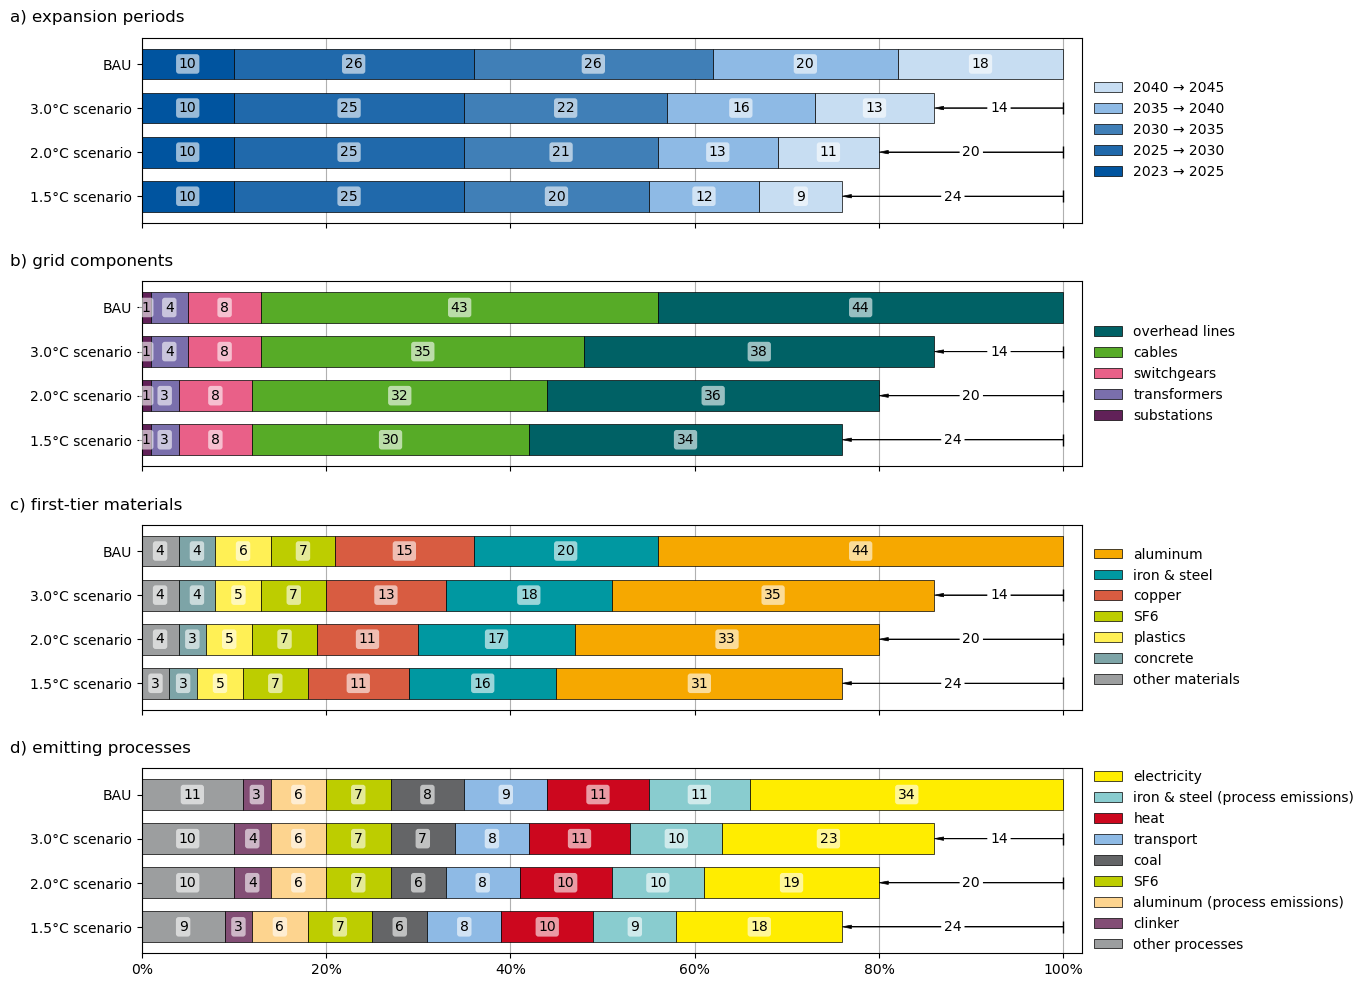

In [20]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

plt.style.use("rwth")

expansion_plot = round_to_percentages(df_expansion_periods)
components_plot = round_to_percentages(components)
materials_plot = round_to_percentages(materials)
processes_plot = round_to_percentages(processes)

scenario_label_mapping = {
    "static": "BAU",
    "Base": "3.0°C scenario",
    "RCP26": "2.0°C scenario",
    "RCP19": "1.5°C scenario",
}
for df in [expansion_plot, components_plot, materials_plot, processes_plot]:
    df.columns = df.columns.map(lambda x: scenario_label_mapping.get(x, x))


fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(14, 10), sharex=True)
plt.subplots_adjust(hspace=0.6)

general_plot_kwargs = dict(
    kind="barh",
    stacked=True,
    width=0.7,
    edgecolor="black",
    linewidth=0.5,
)

expansion_colors = plot_colors_expansion + ["none"]
expansion_plot.T.plot(ax=axes[0], color=expansion_colors, **general_plot_kwargs)

component_colors = ["none"] + plot_colors_components
components_plot.T.plot(ax=axes[1], color=component_colors[::-1], **general_plot_kwargs)

material_colors = ["none"] + plot_colors_materials
materials_plot.T.plot(ax=axes[2], color=material_colors[::-1], **general_plot_kwargs)

process_colors = ["none"] + plot_colors_processes
processes_plot.T.plot(ax=axes[3], color=process_colors[::-1], **general_plot_kwargs)

for idx, (ax, data) in enumerate(
    zip(axes, [expansion_plot, components_plot, materials_plot, processes_plot])
):
    ax.invert_yaxis()
    ax.legend(loc="center left", bbox_to_anchor=(1, 0.5))
    handles, labels = ax.get_legend_handles_labels()
    handles, labels = zip(*[(h, l) for h, l in zip(handles, labels) if l != "SPACING"])
    ax.legend(
        handles[::-1],
        labels[::-1],
        loc="center left",
        bbox_to_anchor=(1, 0.5),
        frameon=False,
    )

    ax.xaxis.grid(True)
    ax.set_axisbelow(True)

    totals = data.sum(axis=1)

    # Adding percentage labels to each bar
    for bar in ax.patches:
        label_x_pos = bar.get_x() + bar.get_width() / 2 
        label_y_pos = bar.get_y() + bar.get_height() / 2
        total_width = sum(
            [p.get_width() for p in ax.patches if p.get_y() == bar.get_y()]
        )  # Sum width of all bars in this row
        percentage = bar.get_width()
        percentage_text = f"{round(percentage)}"
        if percentage > 0:
            rotation = 0
            fontsize = 10
            bbox_props = dict(
                boxstyle="round,pad=0.2", ec="none", fc="white", alpha=0.6
            )
            if bar in ax.patches[-4:]:
                bbox_props = dict(
                    boxstyle="round,pad=0.2", ec="none", fc="white", alpha=1
                )
                if percentage < 5:
                    label_x_pos = label_x_pos + 0.5

            ax.text(
                label_x_pos,
                label_y_pos,
                percentage_text,
                ha="center",
                va="center",
                rotation=rotation,
                fontsize=fontsize,
                bbox=bbox_props,
            )

    # arrows from right end of bars
    for bar in ax.patches[-3:]:
        bar.set_edgecolor("none")

        x_end = bar.get_x() + bar.get_width() 
        y_position = (
            bar.get_y() + bar.get_height() / 2
        )

        head_width = bar.get_height() / 9
        head_length = 1
        ax.arrow(
            x_end,
            y_position,
            -bar.get_width() + head_length,
            0,
            head_width=head_width,
            head_length=head_length,
            width=0.01,
            fc="black",
            ec="black",
            lw=0.5,
        )
        ax.plot(x_end, y_position, marker="|", color="black", markersize=8)

axes[-1].xaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{int(x)}%"))

for ax in axes:
    ax.set_xlim(0, 102)

subplot_labels = ["a) expansion periods", "b) grid components", "c) first-tier materials", "d) emitting processes"]
for i, ax in enumerate(axes):
    ax.text(-0.14, 1.15, subplot_labels[i], transform=ax.transAxes,
    # ax.text(-0.1175, 1.15, subplot_labels[i], transform=ax.transAxes,
            fontsize=12, va='top', ha='left')

plt.subplots_adjust(hspace=0.8)

plt.tight_layout(h_pad=0.5)

plt.savefig("figs/Fig4.svg", format="svg", bbox_inches="tight")
plt.show()

## Burden Shifting (Figure 5)

In [21]:
if recalculate:
    functional_units = {
        "static": {act.id: 1 for act in static_expansion_nodes},
        "Base": {act.id: 1 for act in prospective_expansion_nodes_base},
        "RCP26": {act.id: 1 for act in prospective_expansion_nodes_rcp26},
        "RCP19": {act.id: 1 for act in prospective_expansion_nodes_rcp19},
    }

    chosen_methods = [m for m in bd.methods if "EF v3.1 no LT" in m[1]]

    mlca_config = {
        "impact_categories": chosen_methods,
    }

    data_objs = bd.get_multilca_data_objs(
        functional_units=functional_units, method_config=mlca_config
    )

    mlca = bc.MultiLCA(
        demands=functional_units, method_config=mlca_config, data_objs=data_objs
    )
    mlca.lci()
    mlca.lcia()

    df = pd.DataFrame(mlca.scores.items(), columns=["MethodProcess", "Score"])
    df[["Method", "Process"]] = pd.DataFrame(
        df["MethodProcess"].tolist(), index=df.index
    )

    df_mlca = df.pivot(index="Process", columns="Method", values="Score")

    def extract_ia_name(method_tuple):
        return method_tuple[2][:-6]  # remove "no LT" from the method name

    df_mlca.columns = df_mlca.columns.map(extract_ia_name)

    json.dump(df_mlca.to_dict(), open("data/expansion_all_impact_categories.json", "w"))

In [22]:
import pandas as pd
import json

In [23]:
df_mlca = pd.DataFrame(json.load(open("data/expansion_all_impact_categories.json")))

df_mlca = df_mlca[
    [
        "acidification",
        "climate change",
        "ecotoxicity: freshwater",
        "energy resources: non-renewable",
        "eutrophication: freshwater",
        "eutrophication: marine",
        "eutrophication: terrestrial",
        "human toxicity: carcinogenic",
        "human toxicity: non-carcinogenic",
        "ionising radiation: human health",
        "land use",
        "material resources: metals/minerals",
        "ozone depletion",
        "particulate matter formation",
        "photochemical oxidant formation: human health",
        "water use",
    ]
]

Normalize with respect to the static results:


In [26]:
df_mlca.loc["Base"] = df_mlca.loc["Base"] / df_mlca.loc["static"]
df_mlca.loc["RCP26"] = df_mlca.loc["RCP26"] / df_mlca.loc["static"]
df_mlca.loc["RCP19"] = df_mlca.loc["RCP19"] / df_mlca.loc["static"]
df_mlca.loc["static"] = 1

Plot:

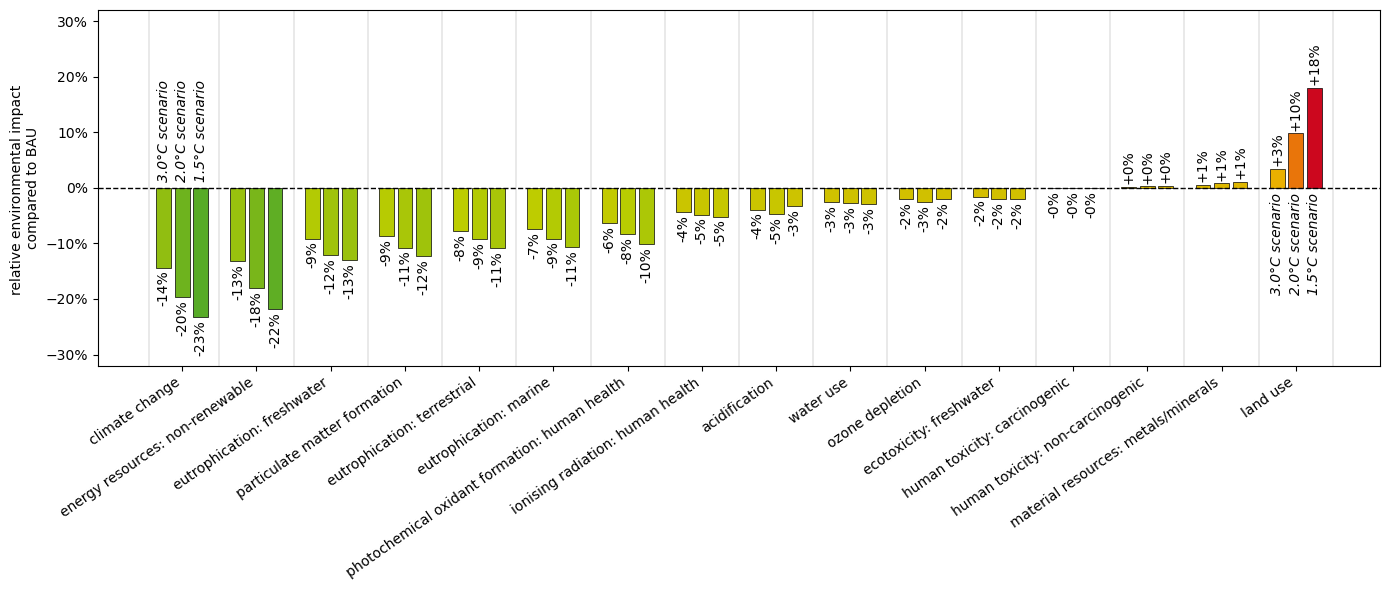

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap, Normalize
from matplotlib.ticker import PercentFormatter

# Assume df_mlca and cm are already defined

values_base = df_mlca.loc["Base"].sort_values(ascending=True)
values_r26 = df_mlca.loc["RCP26"].sort_values(ascending=True)
values_r19 = df_mlca.loc["RCP19"].sort_values(ascending=True)

bordeaux = cm.RWTHBordeaux.p(100)
red = cm.RWTHRot.p(100)
orange = cm.RWTHOrange.p(100)
yellow = cm.RWTHGelb.p(100)
maigreen = cm.RWTHMaiGruen.p(100)
green = cm.RWTHGruen.p(100)

cmap = LinearSegmentedColormap.from_list(
    "custom_red_green", [green, maigreen, orange, red]
)

class MidpointNormalize(Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=0, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        result, is_scalar = self.process_value(value)
        self.autoscale_None(result)
        vmin, vmax, midpoint = self.vmin, self.vmax, self.midpoint
        x, y = [vmin, midpoint, vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(result, x, y))

shifted_base = values_base - 1
shifted_r26 = values_r26 - 1
shifted_r19 = values_r19 - 1

all_values = np.concatenate([shifted_r26, shifted_r19, shifted_base])
norm = MidpointNormalize(vmin=all_values.min(), vmax=all_values.max(), midpoint=0)

fig, ax = plt.subplots(figsize=(14, 6))
index = np.arange(len(values_r26)) * 2.5
bar_height = 0.5

bars_base = ax.bar(
    index,
    shifted_base,
    bar_height,
    color=cmap(norm(shifted_base.values)),
    edgecolor="black",
    linewidth=0.5,
)
bars_r19 = ax.bar(
    index + 2.5 * bar_height,
    shifted_r19,
    bar_height,
    color=cmap(norm(shifted_r19.values)),
    edgecolor="black",
    linewidth=0.5,
)
bars_r26 = ax.bar(
    index + 1.25 * bar_height,
    shifted_r26,
    bar_height,
    color=cmap(norm(shifted_r26.values)),
    edgecolor="black",
    linewidth=0.5,
)

ax.set_ylabel("relative environmental impact \ncompared to BAU")
ax.set_ylim(-0.32, 0.32)
ax.axhline(y=0, color="black", linestyle="--", linewidth=1)
ax.set_xticks(index + 1.25 * bar_height)
ax.set_xticklabels(labels=values_r26.index, rotation=35, ha="right")

datasets = [shifted_r26, shifted_r19, shifted_base]
bar_positions = [index + 1.25 * bar_height, index + 2.5 * bar_height, index]

for dataset, bars, position, scenario_label in zip(
    datasets,
    [bars_r26, bars_r19, bars_base],
    bar_positions,
    ["2.0°C scenario", "1.5°C scenario", "3.0°C scenario"],
):
    for idx, height in enumerate(dataset):
        percentage_change = height * 100
        sign = "+" if percentage_change > 0 else ""
        text = f"{sign}{percentage_change:.0f}%"
        ax.text(
            position[idx],
            height + 0.005 if height > 0 else height - 0.005,
            text,
            ha="center",
            va="bottom" if height > 0 else "top",
            rotation=90,
        )
        if idx == 0 or idx == len(dataset) - 1:
            ax.text(
                position[idx],
                -0.01 if height > 0 else 0.01,
                scenario_label,
                ha="center",
                va="top" if height > 0 else "bottom",
                rotation=90,
                style="italic",
            )

ax.axvline(x=-0.5, color="grey", linestyle="-", linewidth=0.25)
for x_pos in index + 3.75 * bar_height:
    ax.axvline(x=x_pos, color="grey", linestyle="-", linewidth=0.25)

ax.yaxis.set_major_formatter(PercentFormatter(1, decimals=0))
plt.tight_layout()
plt.savefig("figs/Fig5.svg", format="svg", bbox_inches="tight")
plt.show()